In [26]:
import os, pathlib
os.chdir("/Users/gregcc/Documents/GitHub/SURP25/Microlensing")

In [27]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from ML import TwoLens1S
from ML import ThreeLens1S

# Parameters

In [28]:
#parameters from Liebig, et al; (2010)
q2 = 1e-3
q3 = 1e-5
s2 = 1.3
s3 = 1.3003845585056752
psi = 1.393457227228705
q4 = q3 + q2 #for binary system
u0_list =[-0.0445] #paper

t0 = 0
tE = 20
rho = 0.0018
rs = rho

secnum = 45
basenum = 2
num_points = 1000

In [29]:
#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

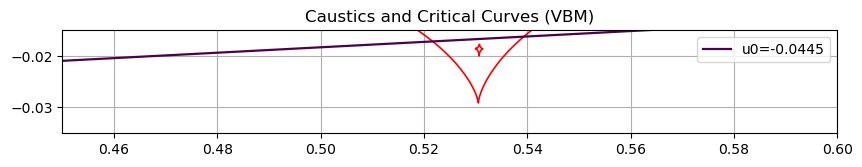

In [74]:
triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, -0.015)
plt.show()

In [31]:
#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

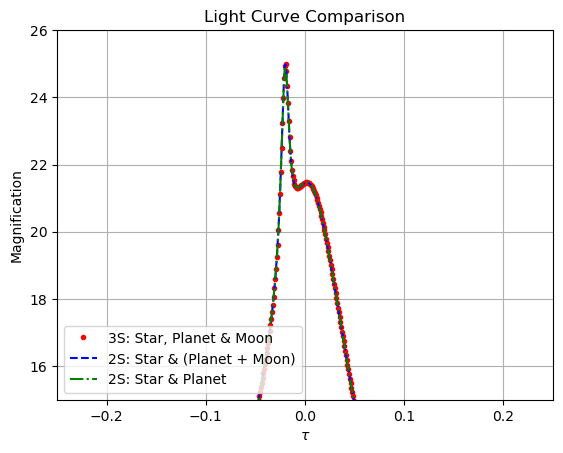

In [32]:
#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.25, .25)
plt.ylim(15, 26)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

In [33]:
#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

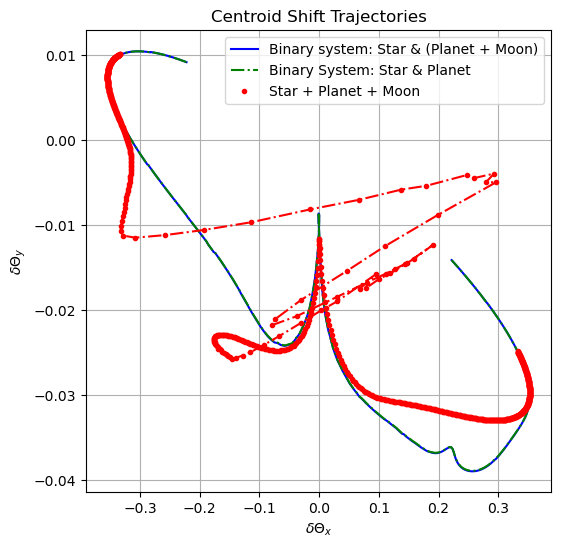

In [36]:
#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

# Changing Mass

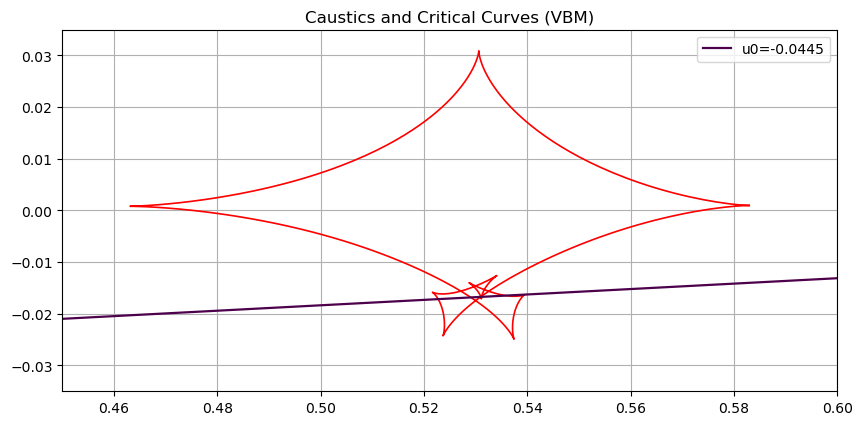

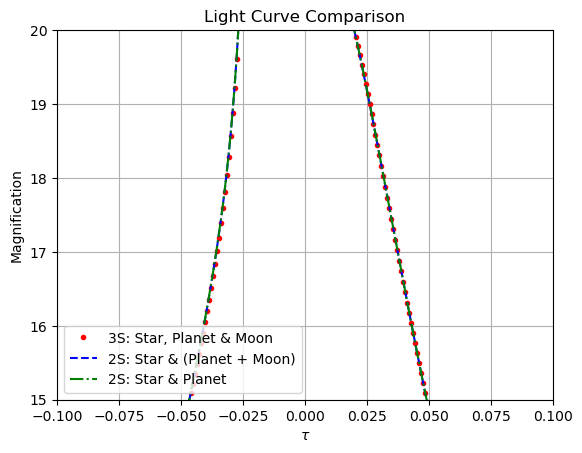

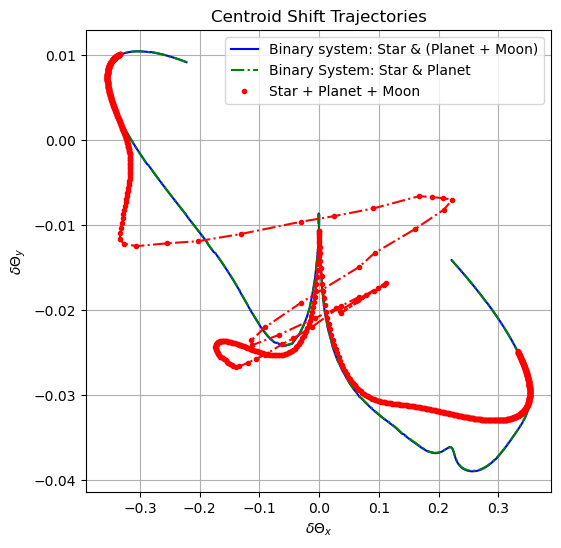

In [37]:
q3 = 1e-4

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

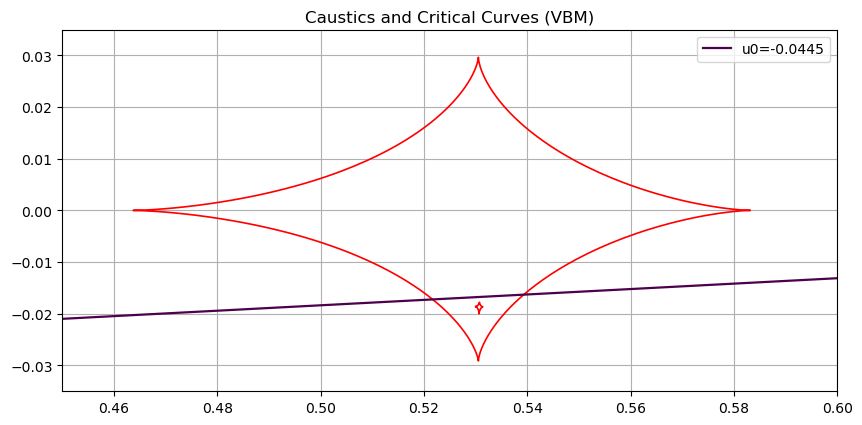

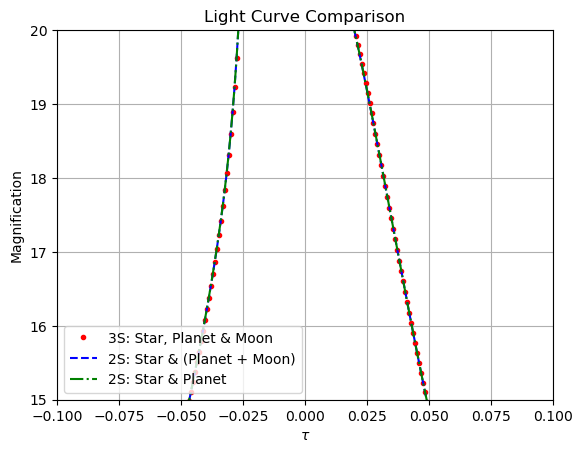

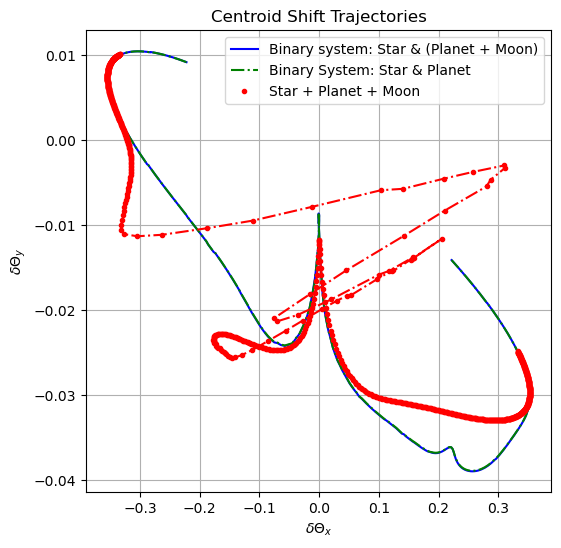

In [38]:
q3 = 1e-6

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

# Changing Moon Location

In [49]:
def Moon_Geometry(s2, d, phi_deg):
    """
    Compute s3 and psi given planet position s2, planet-moon distance d,
    and angle phi (degrees) measured from the star-planet axis.
    
    Returns
    -------
    s3 : float
        Star-moon separation (in Einstein radius units)
    psi : float
        Angle of moon relative to x-axis (radians)
    """
    phi = np.radians(phi_deg)
    x_m = s2 + d * np.cos(phi)
    y_m = d * np.sin(phi)
    
    s3 = np.sqrt(x_m**2 + y_m**2)
    psi_deg = np.degrees(np.arctan2(y_m, x_m))
    return s3, psi_deg


In [57]:
s2     = 1.3
q2     = 1e-3
d      = np.sqrt(q2)   # planetary Einstein radius
phi_deg = 360    # put moon below the planet

s3, psi = Moon_Geometry(s2, d, phi_deg)
print("s3 =", s3, "psi =", psi)

s3 = 1.331622776601684 psi = -3.3325929013137783e-16


In [59]:
s3_1 = 1.331622776601684
s3_2 = 1.3225497220955418
s3_3 = 1.3003845585056752
s3_4 = 1.27783497862009
s3_5 = 1.2683772233983162
s3_6 = 1.2778349786200898
s3_7 = .3003845585056752

psi_1 = 0.00
psi_2 = 0.9687602688129292
psi_3 = 1.393457227228705
psi_4 = 1.0026630929704057
psi_5 = 1.7493835945116542e-16
psi_6 = -1.0026630929704057
psi_7 = -1.393457227228705

q3 = 1e-5

In [ ]:
ex1_m = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_1, 357, psi_1, rs, secnum, basenum, num_points)

param = [
    np.log(ex1_m.s2), np.log(ex1_m.q2), ex1_m.u0_list[0], ex1_m.alpha_deg,
    np.log(ex1_m.rho), np.log(ex1_m.tE), ex1_m.t0,
    np.log(ex1_m.s3), np.log(ex1_m.q3), ex1_m.psi_rad
]
mag, *_ = ex1_m.VBM.TripleLightCurve(param, ex1_m.highres_t)


three_system = ex1_m.systems[0]


delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

ex2 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_2, 357, psi_2, rs, secnum, basenum, num_points)

param = [
    np.log(ex2.s2), np.log(ex2.q2), ex2.u0_list[0], ex2.alpha_deg,
    np.log(ex2.rho), np.log(ex2.tE), ex2.t0,
    np.log(ex2.s3), np.log(ex2.q3), ex2.psi_rad
]
mag, *_ = ex2.VBM.TripleLightCurve(param, ex2.highres_t)

three_system2 = ex2.systems[0]

delta_x_three2 = three_system2['cent_x'] - three_system2['y1s']
delta_y_three2 = three_system2['cent_y'] - three_system2['y2s']

delta_x_three2 = - delta_x_three2
delta_y_three2 = delta_y_three2

ex3 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_3, 357, psi_3, rs, secnum, basenum, num_points)

param = [
    np.log(ex3.s2), np.log(ex3.q2), ex3.u0_list[0], ex3.alpha_deg,
    np.log(ex3.rho), np.log(ex3.tE), ex3.t0,
    np.log(ex3.s3), np.log(ex3.q3), ex3.psi_rad
]
mag, *_ = ex3.VBM.TripleLightCurve(param, ex3.highres_t)

three_system3 = ex3.systems[0]

delta_x_three3 = three_system3['cent_x'] - three_system3['y1s']
delta_y_three3 = three_system3['cent_y'] - three_system3['y2s']

delta_x_three3 = - delta_x_three3
delta_y_three3 = delta_y_three3

ex4 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_4, 357, psi_4, rs, secnum, basenum, num_points)

param = [
    np.log(ex4.s2), np.log(ex4.q2), ex4.u0_list[0], ex4.alpha_deg,
    np.log(ex4.rho), np.log(ex4.tE), ex4.t0,
    np.log(ex4.s3), np.log(ex4.q3), ex4.psi_rad
]
mag, *_ = ex4.VBM.TripleLightCurve(param, ex4.highres_t)

three_system4 = ex4.systems[0]

delta_x_three4 = three_system4['cent_x'] - three_system4['y1s']
delta_y_three4 = three_system4['cent_y'] - three_system4['y2s']

delta_x_three4 = - delta_x_three4
delta_y_three4 = delta_y_three4

ex5 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_5, 357, psi_5, rs, secnum, basenum, num_points)

param = [
    np.log(ex5.s2), np.log(ex5.q2), ex5.u0_list[0], ex5.alpha_deg,
    np.log(ex5.rho), np.log(ex5.tE), ex5.t0,
    np.log(ex5.s3), np.log(ex5.q3), ex5.psi_rad
]
mag, *_ = ex5.VBM.TripleLightCurve(param, ex5.highres_t)

three_system5 = ex5.systems[0]

delta_x_three5 = three_system5['cent_x'] - three_system5['y1s']
delta_y_three5 = three_system5['cent_y'] - three_system5['y2s']

delta_x_three5 = - delta_x_three5
delta_y_three5 = delta_y_three5

ex6 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_6, 357, psi_6, rs, secnum, basenum, num_points)

param = [
    np.log(ex6.s2), np.log(ex6.q2), ex6.u0_list[0], ex6.alpha_deg,
    np.log(ex6.rho), np.log(ex6.tE), ex6.t0,
    np.log(ex6.s3), np.log(ex6.q3), ex6.psi_rad
]
mag, *_ = ex6.VBM.TripleLightCurve(param, ex6.highres_t)

three_system6 = ex6.systems[0]

delta_x_three6 = three_system6['cent_x'] - three_system6['y1s']
delta_y_three6 = three_system6['cent_y'] - three_system6['y2s']

delta_x_three6 = - delta_x_three6
delta_y_three6 = delta_y_three6

ex7 = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3_7, 357, psi_7, rs, secnum, basenum, num_points)

param = [
    np.log(ex7.s2), np.log(ex7.q2), ex7.u0_list[0], ex7.alpha_deg,
    np.log(ex7.rho), np.log(ex7.tE), ex7.t0,
    np.log(ex7.s3), np.log(ex7.q3), ex7.psi_rad
]
mag, *_ = ex7.VBM.TripleLightCurve(param, ex7.highres_t)

three_system7 = ex7.systems[0]

delta_x_three7 = three_system7['cent_x'] - three_system7['y1s']
delta_y_three7 = three_system7['cent_y'] - three_system7['y2s']

delta_x_three7 = - delta_x_three7
delta_y_three7 = delta_y_three7


In [71]:
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

two_system = double_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

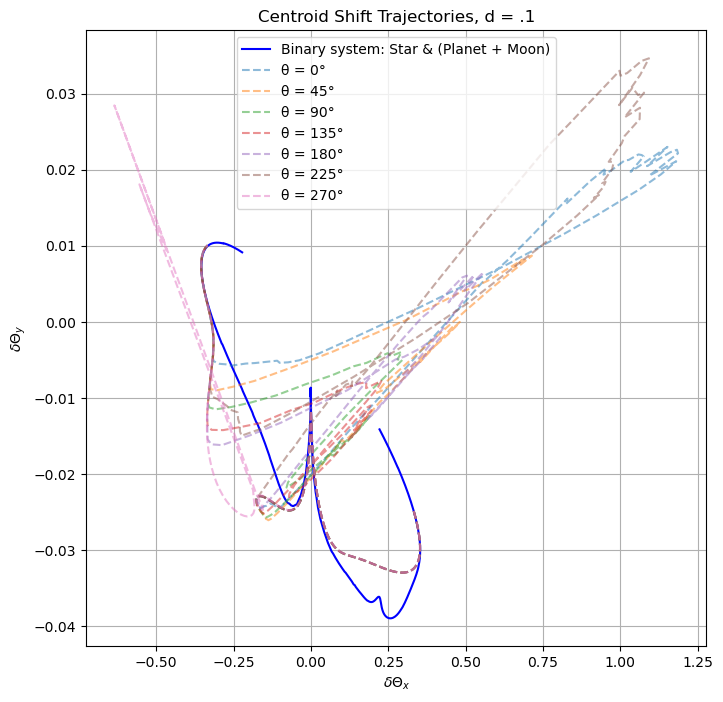

In [72]:
plt.figure(figsize=(8,8))

plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')

plt.plot(delta_x_three, delta_y_three, '--', label='θ = 0°', alpha = 0.5)
plt.plot(delta_x_three2, delta_y_three2, '--', label='θ = 45°', alpha = 0.5)
plt.plot(delta_x_three3, delta_y_three3, '--', label='θ = 90°', alpha = 0.5)
plt.plot(delta_x_three4, delta_y_three4, '--', label='θ = 135°', alpha = 0.5)
plt.plot(delta_x_three5, delta_y_three5, '--', label='θ = 180°', alpha = 0.5)
plt.plot(delta_x_three6, delta_y_three6, '--', label='θ = 225°', alpha = 0.5)
plt.plot(delta_x_three7, delta_y_three7, '--', label='θ = 270°', alpha = 0.5)


#plt.xlim(-.2,0)
#plt.ylim(-0.05,0.05)

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories, d = .1")
plt.grid(True)
plt.legend()
plt.show()

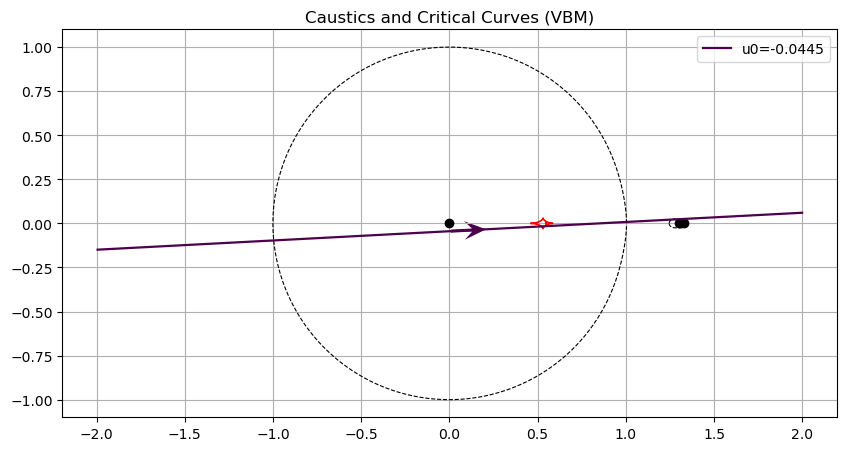

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Caustics and Critical Curves (VBM)'}>)

In [66]:
ex1_m.plot_caustics_and_critical()